## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [17]:
import os
import keras

In [18]:
train, test = keras.datasets.cifar10.load_data()

In [19]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [20]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [21]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [22]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.05
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.1,0.5,0.8,0.95]

In [29]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for  m in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (m))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(nesterov=True, momentum=m)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentem-%s" % str(m)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.9883 - acc: 0.2898 - val_loss: 1.9533 - val_acc: 0.2820
Epoch 2/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.8088 - acc: 0.3605 - val_loss: 1.7858 - val_acc: 0.3668
Epoch 3/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.7365 - acc: 0.3861 - val_loss: 1.7246 - val_acc: 0.3847
Epoch 4/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.6854 - acc: 0.4053 - val_loss: 1.8091 - val_acc: 0.3598
Epoch 5/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.6472 - acc: 0.4211 - val_loss: 1.6136 - val_acc: 0.4334
Epoch 6/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.6143 - acc: 0.4324 - val_loss: 1.6421 - val_acc: 0.4163
Epoch 7/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.5842 - acc: 0.4433 - val_loss: 1.6043 - 

Epoch 2/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.7190 - acc: 0.3934 - val_loss: 1.7125 - val_acc: 0.3829
Epoch 3/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.6330 - acc: 0.4247 - val_loss: 1.6045 - val_acc: 0.4292
Epoch 4/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.5717 - acc: 0.4427 - val_loss: 1.5949 - val_acc: 0.4248
Epoch 5/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.5345 - acc: 0.4560 - val_loss: 1.5102 - val_acc: 0.4613
Epoch 6/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.4847 - acc: 0.4733 - val_loss: 1.5182 - val_acc: 0.4628
Epoch 7/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.4500 - acc: 0.4864 - val_loss: 1.6712 - val_acc: 0.4048
Epoch 8/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.4251 - acc: 0.4920 - val_loss: 1.6334 - val_acc: 0.4274
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 8s 165us/step - loss: 1.5117 - acc: 0.4639 - val_loss: 1.4899 - val_acc: 0.4701
Epoch 4/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.4432 - acc: 0.4852 - val_loss: 1.5039 - val_acc: 0.4579
Epoch 5/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.3963 - acc: 0.5042 - val_loss: 1.4529 - val_acc: 0.4809
Epoch 6/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.3591 - acc: 0.5186 - val_loss: 1.5163 - val_acc: 0.4570
Epoch 7/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.3170 - acc: 0.5345 - val_loss: 1.4313 - val_acc: 0.4891
Epoch 8/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.2857 - acc: 0.5408 - val_loss: 1.4035 - val_acc: 0.4990
Epoch 9/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.2551 - acc: 0.5549 - val_loss: 1.3512 - val_acc: 0.5194
Epoch 10/50
50000/50000 [====================

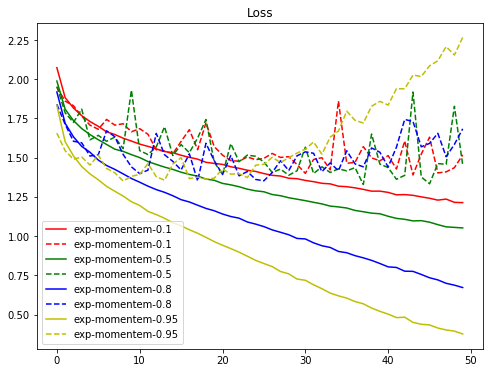

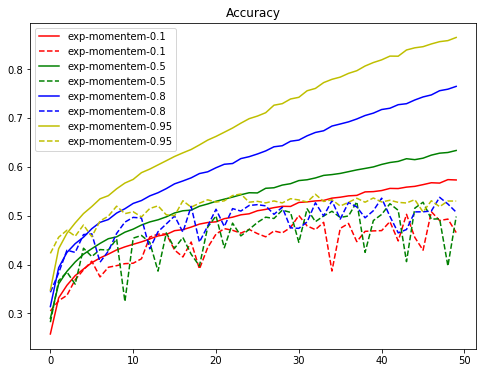

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [34]:
results = {}
for m in MOMENTUM:
    keras.backend.clear_session() 
    print("Experiment with Momentum = %.6f" % (m))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(nesterov=False, momentum=m)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentem-%s" % str(m)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Momentum = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.9761 - acc: 0.2932 - val_loss: 1.8634 - val_acc: 0.3508
Epoch 2/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.7900 - acc: 0.3681 - val_loss: 1.7839 - val_acc: 0.3627
Epoch 3/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.7150 - acc: 0.3948 - val_loss: 1.7680 - val_acc: 0.3508
Epoch 4/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.6647 - acc: 0.4113 - val_loss: 1.6642 - val_acc: 0.4060
Epoch 5/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.6222 - acc: 0.4290 - val_loss: 1.6594 - val_acc: 0.4054
Epoch 6/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.5876 - acc: 0.4407 - val_loss: 1.5674 - val_acc: 0.4495
Epoch 7/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.5578 - acc: 0.4513 - val_loss: 1.6214 - 

Epoch 2/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.7035 - acc: 0.3964 - val_loss: 1.6739 - val_acc: 0.4129
Epoch 3/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.6213 - acc: 0.4267 - val_loss: 1.6799 - val_acc: 0.4096
Epoch 4/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.5683 - acc: 0.4437 - val_loss: 1.5377 - val_acc: 0.4583
Epoch 5/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.5159 - acc: 0.4646 - val_loss: 1.5633 - val_acc: 0.4445
Epoch 6/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.4789 - acc: 0.4772 - val_loss: 1.4923 - val_acc: 0.4756
Epoch 7/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.4468 - acc: 0.4896 - val_loss: 1.4533 - val_acc: 0.4869
Epoch 8/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.4152 - acc: 0.4986 - val_loss: 1.4690 - val_acc: 0.4823
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 8s 166us/step - loss: 1.5909 - acc: 0.4338 - val_loss: 1.5730 - val_acc: 0.4322
Epoch 4/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.5278 - acc: 0.4554 - val_loss: 1.5100 - val_acc: 0.4656
Epoch 5/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.5006 - acc: 0.4614 - val_loss: 1.5013 - val_acc: 0.4599
Epoch 6/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.4517 - acc: 0.4818 - val_loss: 1.4764 - val_acc: 0.4721
Epoch 7/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.4268 - acc: 0.4883 - val_loss: 1.4326 - val_acc: 0.4916
Epoch 8/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.3952 - acc: 0.5013 - val_loss: 1.4690 - val_acc: 0.4758
Epoch 9/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.3827 - acc: 0.5057 - val_loss: 1.4152 - val_acc: 0.4994
Epoch 10/50
50000/50000 [====================

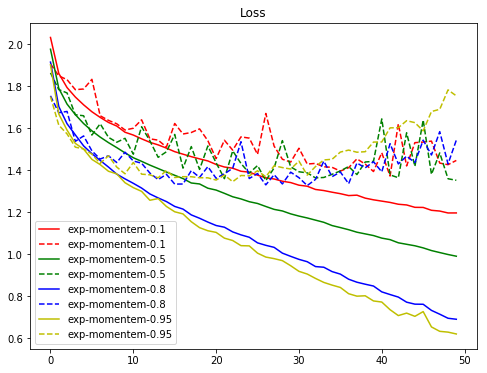

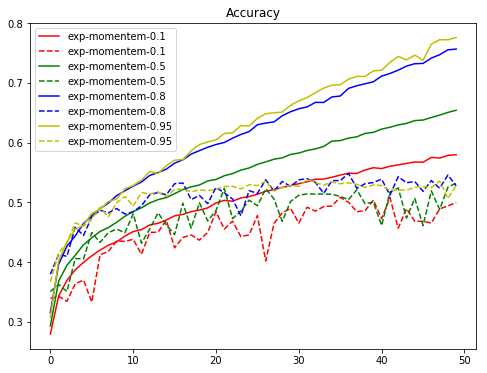

In [35]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()